# Your first Recurrent Neural Network (RNN)

🙌 Welcome to RNNs! After using CNNs in the previous lesson to deal with images (spatial data), you are going to deal with time-related data (***temporal data***).

🎯 Goals of this warm-up challenge:
1. Understand what temporal data is
2. Build your first Recurrent Neural Network



# A Note on Google Colab

From now on, you no longer need to use Google Colab. There will be **no performance gains** from using it, as today's machines are powerful enough as it is — especially if you're on a MacBook with an MX chip! 😉

Proceed with the challenge as you normally would.

Good luck! 🚀

## (1) The dataset

🔢 Imagine that we have access to some data about employees in a company.

In [1]:
import numpy as np

X = np.load('X.npy')
y = np.load('y.npy')

In [2]:
X.shape, y.shape

((25000, 10, 3), (25000,))

☝️ The dataset describes the evolution of the **employment status of 25 000 employees, year after year**: each sequence corresponds to 10 consecutive years, where each year describes a job situation, comprising 3 components
- the salary,
- the number of people under someone's responsibility,
- the size of the company. 

🕵🏻 To understand the dataset a bit better, let's look at the data of the first employee.

In [3]:
import pandas as pd

employee_0 = pd.DataFrame(X[0],
                          columns=['salary',
                                   'responsibility',
                                   'company_size'])
round(employee_0,2)

,salary,responsibility,company_size
0,0.80,10.73,102.0
1,0.50,10.73,102.0
2,0.60,10.73,102.0
3,0.71,10.73,130.0
4,0.94,10.73,130.0
5,1.05,10.73,130.0
6,1.12,32.00,108.0
7,4.87,32.00,108.0
8,4.97,33.00,108.0
9,5.20,39.00,108.0


🎯 The goal in this challenge is to predict the montly salary on the 11th year for each of these 25,000 employees, based on the past observations.

In [4]:
# For example, the first employee earns 6.499 k USD per month
# during the 11th year at the company
y[0]

6.499

📈 To help you get a better understanding about the evolution of the salaries, the number of people under their responsibility and the company size over the years, you can run the cell down below. Can you visually detect some correlations between these three variables?

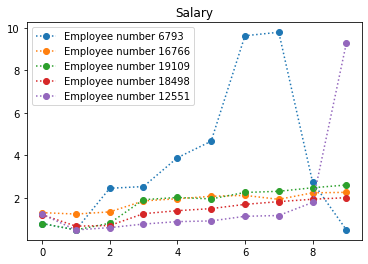

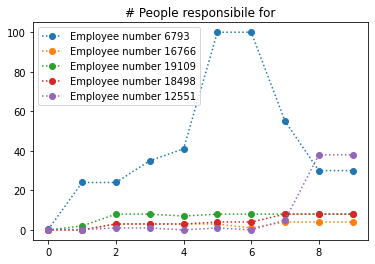

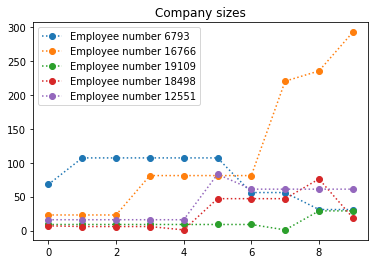

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

number_of_employees = len(X)
number_of_randomly_selected_employees = 5

random_selection = np.random.randint(0, 
                                     number_of_employees,
                                     number_of_randomly_selected_employees)

# As the employees are selected randomly, feel free to re-run this cell a few times !

plt.title('Salary')

for r in random_selection:
    plt.plot(X[r, :, 0],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('# People responsibile for')
for r in random_selection:
    plt.plot(X[r, :, 1],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('Company sizes')
for r in random_selection:
    plt.plot(X[r, :, 2],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

❓ **Question** ❓ Plot the distribution of:
* all the salaries during the 10th year, 
* people under someone's responsibility, 
* and the company sizes 

to get a better understanding of the variability of observations

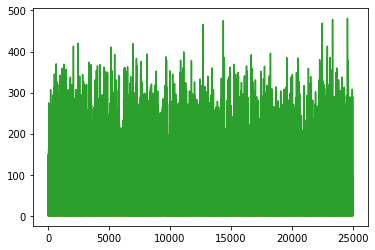

In [13]:
# YOUR CODE HERE
plt.plot(X[:,0])

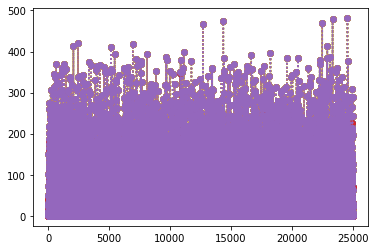

In [20]:
for r in random_selection:
    plt.plot(X[ :, 0],label=f"Employee number {r}",linestyle=":",marker="o")
plt.show()

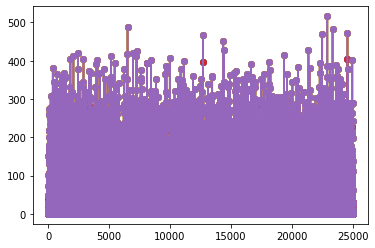

In [31]:
for r in random_selection:
    plt.plot(X[ :, 1],marker='o')
plt.show()

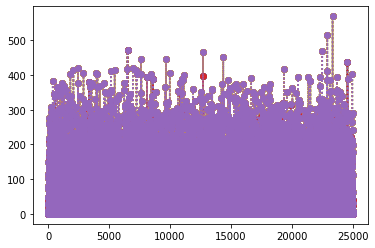

In [30]:
for r in random_selection:
    plt.plot(X[ :, 2],linestyle=":",marker="o")
    
plt.show()

❓ **Question** ❓  Split your dataset between a train and test set (80/20)

In [34]:
len(X)*0.8

20000.0

In [57]:
# YOUR CODE HERE
X_train = X[:20000]
X_test = X[20000:]

y_train = y[:20000]
y_test = y[20000:]

In [54]:
X_train.shape , X_test.shape

((20000, 10, 3), (5000, 10, 3))

In [58]:
y_train.shape, y_test.shape

((20000,), (5000,))

## (2) A Simple RNN

🤗 Now that you are familiar with this company's dataset, you will create your first Recurrent Neural Network. Let's start with a simple architecture.

❓ **Question** ❓ Write a model that has: 
- a ***Normalization*** layer adapted to the training set
- a ***SimpleRNN*** layer with 20 *units* (don't forget that `tanh` is better suited as an activation function for a Recurrent Layer)
- a ***Dense*** layer with 10 neurons
- a ***Dense*** layer specific to your task (= to ***predict*** a salary)

👩🏻‍🏫 <u>Remember</u>: You don't need to specify an `input_shape`: as soon as your Normalizer has been adapted to your train set, it has memorized the input shape!

In [102]:
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, LSTM
from tensorflow.keras import layers

In [88]:
# YOUR CODE HERE
normalization_layer = Normalization()
normalization_layer.adapt(X_train)

model = Sequential()
model.add(normalization_layer)
model.add(layers.SimpleRNN(units=20, activation='tanh'))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(1, activation="linear"))

❓ **Question**: How many trainable parameters does your RNN have ❓

In [89]:
# YOUR CODE HERE
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, None, 3)          7         
 ion)                                                            
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 20)                480       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 708
Trainable params: 701
Non-trainable params: 7
_________________________________________________________________


❓ **Question** ❓ Try to recompute the number of parameters manually.


parcial_params = 20 * (20 + 3 + 1)
parcial_params2 = (20 * 10) + 10
parcial_params3 = 1 + 10
total_params = parcial_params + parcial_params2 + parcial_params3

❓ **Question** ❓ Compile your model. For RNN, we recommend you to use the ***rmsprop*** optimizer (instead of *adam*).

In [99]:
# YOUR CODE HERE
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'mae'])

❓ **Questions** ❓ 

* Train your model on your training dataset:
    * use a Validation Split of 20%
    * and an Early Stopping Criterion with patience $= 5 $
* Evaluate your performance on the test set

In [100]:
# YOUR CODE HERE
model.fit(X_train, y_train,
         batch_size=32,
         epochs=10, verbose=0, validation_split=0.2)

In [80]:
X_norma.shape, y_train.shape

(TensorShape([20000, 10, 3]), (20000,))

## (3) Baseline comparison

❗️ **Important Reminder** ❗️: Always remember to compare your Deep Learning models, and more generally any Machine Learning model, to a baseline. 

🧑🏻‍🏫 Remember that our goal is to predict the salary of the employees for the 11th year. It is a ***Regression Task***. What baseline could we build? 
1. In the case of a traditional regression model, a baseline prediction for `y_test` is  to **predict the average of `y_train`**... but this option could be irrelevant for time-related series. Theoretically, someone's salary is supposed to increase over the years!
2. An alternative baseline prediction for a regression task is to **predict the last seen value**

❓ **Questions** ❓ 
* Compute the Mean Absolute Error of a baseline model that predicts that the salary remains constant between the 10-th and 11-th year
* Compare this baseline model to your RNN

In [98]:
# YOUR CODE HERE
y_pred = pd.Series(y).diff()
mae = (y - y_pred).mean()
mae

5.1658199527981115

In [101]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 1s 4ms/step - loss: 0.8058 - mse: 0.8058 - mae: 0.3438


[0.8058018684387207, 0.8058018684387207, 0.3438299000263214]

😁 You should notice that your RNN performs a bit better than a baseline model.

## (4) LSTM: Long-Short Term Memory

❓ **Questions** ❓ 

* Write the exact same model, but with a `LSTM` layer instead of a `SimpleRNN` layer
* Evaluate your performance on the test set

In [103]:
# YOUR CODE HERE
model2 = Sequential()
model2.add(normalization_layer)
model2.add(layers.LSTM(units=20, activation='tanh'))
model2.add(layers.Dense(10, activation="relu"))
model2.add(layers.Dense(1, activation="linear"))

In [106]:
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'mae'])

In [107]:
model2.fit(X_train, y_train,
         batch_size=32,
         epochs=10, verbose=0, validation_split=0.2)

In [108]:
model2.evaluate(X_test, y_test)

157/157 [==============================] - 2s 4ms/step - loss: 0.8075 - mse: 0.8075 - mae: 0.3200


[0.8075257539749146, 0.8075257539749146, 0.31996551156044006]

💪 The LSTM should perform a bit better than the SimpleRNN with a lower MAE.

🏁 Congratulations! You know how to train a RNN on sequential data.
 

💾 Do not forget to git add/commit/push your notebook...

🚀 ... and move to the next challenge!

---

<u>Note</u>: The sequences you worked with are totally fake. In case, you need to train and reproduce similar data, you can find below the functions that have been used to simulate such a dataset.

## (Utils)

In [109]:
def create_sequences(number):
    X, y = [], []
    
    for i in range(number):
        x_i, y_i = create_individual_sequence(10)
        X.append(x_i)
        y.append(y_i)
        
    return np.array(X), np.array(y)
            
def create_individual_sequence(length):
    company_sizes = []
    nb_persons = []
    salaries = []
    
    
    # Education level
    educ_level = [max(0, int(np.random.normal(10, 2)))]*length
    
    # Company size
    current_size = int(1 + np.random.beta(.4, 4)*500)
    for i in range(length):
        if not np.random.randint(4): # Change 1 out of 3 possibilities 
            current_size = int(max(1, np.random.normal(current_size, 50)))
        company_sizes.append(current_size)
    
    # Number of persons
    nb_iter = np.random.beta(.15, 4)*300
    for i in range(length):
        if not np.random.randint(2): # Change 1 out of 2 possibilities
            R_1 = np.random.beta(0.5, 8)*3
            nb_iter = nb_iter + max(-2, R_1*company_sizes[i] + np.random.randint(-2, 2))
            nb_iter = max(0, nb_iter)
            nb_iter = int(min(company_sizes[i]-1, nb_iter))
        nb_persons.append(nb_iter)
        
    
    # Salary
    salary_iter = max(800, int(np.random.normal(1200, 300)+ 0.05*company_sizes[0] +  np.random.normal(40, 400)))
    salaries.append(salary_iter)
    for i in range(1, length + 1):
        R_1 = np.random.normal(100, 50)
        change_person = nb_persons[i-1] - nb_persons[i-2]
        change_company = max(0, company_sizes[i-1] - company_sizes[i-2])
        salary_iter = salary_iter + 0.05*change_company + change_person*R_1 + np.random.normal(100, 50)
        salary_iter = max(int(salary_iter), 500)
        
        salaries.append(salary_iter)

    y = salaries[-1]/1000
    salaries = [_/1000 for _ in salaries[:-1]]
    
    return np.array([salaries, nb_persons, company_sizes]).T, y

In [ ]:
#X, y = create_sequences(25000)

#np.save('X', X.astype(np.float32))
#np.save('y', y)